<a href="https://colab.research.google.com/github/stackettecode/Drills/blob/master/Project_1/Stephanie_Mather_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [0]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [0]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

('data shape: ', (70000, 784))
('label shape:', (70000,))


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

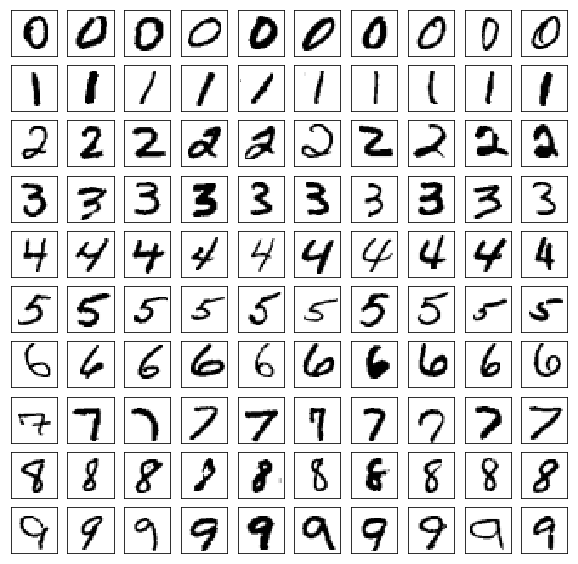

In [0]:
def P1(num_examples=10):

### STUDENT START ###
  labels = sorted(set(train_labels)) # create a list of labels for the digits
  num_labels = len(labels) # count number of possible labels
  cmap = plt.cm.gray_r # Convert color map to grey scale

   
 # Set the figure data 
  fig,ax = plt.subplots(nrows=num_labels, ncols=num_examples, figsize=(num_examples, num_labels))
   
# # Iterate over the labels, creating a 10x10 subplots with 10 examples of each label.
  for label in range(num_labels):  
    im_idx = np.argwhere(Y == labels[label]) # builds array of the locations where the label equals the label being plotted
    for num in range(num_examples): # iterate for as many times as the number of example chosen by the user
      image_pl = np.reshape(X[im_idx][num],(28,28)) # reshape image array to 28x28 for plotting
      ax[label,num].imshow(image_pl, cmap = cmap) #plot image  
      ax[label,num].set_xticks([]) # remove ticks on x 
      ax[label,num].set_yticks([]) # remove ticks on y       
      

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [0]:
def P2(k_values):

### STUDENT START ###
  """fit K-Nearest-Neighbors model with different number of k using the mini training set and return score"""

# compare score with differing values of k_values
  for k_value in k_values:
      my_score = get_score(k_value, mini_train_data, dev_data, mini_train_labels, dev_labels)
      print("K-Nearest Neighbors with k: %s the accuracy score is %s" %(k_value, my_score))

  # For k=1, show precision, recall, and F1 for each label. 
  kn_model1=KNeighborsClassifier(n_neighbors=1)
  kn_model1.fit(mini_train_data, mini_train_labels)
  accuracy = classification_report(dev_labels, kn_model1.predict(dev_data))   
  print("\n\nK-Nearest Neighbors with k: %s  \n %s" %(1, accuracy))

def get_score(k_value, train_X, val_X, train_y, val_y):
  """Function to return single accuracy score for a KNeighborsClassifier model"""
  model = KNeighborsClassifier(n_neighbors=k_value)
  model.fit(train_X, train_y)
  accuracy = model.score(val_X, val_y)
  return(accuracy)
  
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

K-Nearest Neighbors with k: 1 the accuracy score is 0.884
K-Nearest Neighbors with k: 3 the accuracy score is 0.876
K-Nearest Neighbors with k: 5 the accuracy score is 0.882
K-Nearest Neighbors with k: 7 the accuracy score is 0.877
K-Nearest Neighbors with k: 9 the accuracy score is 0.875


K-Nearest Neighbors with k: 1  
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88  

ANSWER:

**Higher Order kNN:**
The highest accuracy was for the k=1 model, However, there is not much loss in accuracy for larger k values. The additional complexity added by increasing k did not increase accuracy on the test data set. A larger k suppresses the effects of noise, but makes the classification boundaries less distinct, which can be useful for some dataset that require more generalisation. We have enough data compared to the number of classifiers that this increase in generalisation is not required to improve performance.

**NN Model Accuracy:**
The f1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0. From this score, 8 was the hardest number to classify overall. For the kNN with k=1 model the lowest precision score was for 9. This shows that this number was the most likely to have false positives, i.e. numbers classified as 9 that were not 9. 8 also had low precision. The lowest recall was for 8, this means this number was most likely to have the most false negatives, i.e. the model failed to classify the 8's as a 8.  4 also had a low precision. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [0]:
def P3(train_sizes, accuracies):

### STUDENT START ###

# compare score with differing values of k_values
  model = KNeighborsClassifier(n_neighbors=1) # create a KNeighborsClassifier model, k=1
  for train_size in train_sizes:
    model.fit(train_data[:train_size], train_labels[:train_size]) # fit the model for the training data set
    
    # Calculate the accuracy on the development data and time the model
    start_time = time.time() 
    accuracy = model.score(dev_data, dev_labels) 
    train_time =  time.time() - start_time 
    
    # Print output
    print("K-Nearest Neighbors with training set size: %s the accuracy score is %s & time to compute is %0.2f seconds" %(train_size, accuracy, train_time))
    accuracies.append(accuracy)


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

K-Nearest Neighbors with training set size: 100 the accuracy score is 0.702 & time to compute is 0.17 seconds
K-Nearest Neighbors with training set size: 200 the accuracy score is 0.791 & time to compute is 0.33 seconds
K-Nearest Neighbors with training set size: 400 the accuracy score is 0.811 & time to compute is 0.64 seconds
K-Nearest Neighbors with training set size: 800 the accuracy score is 0.866 & time to compute is 1.29 seconds
K-Nearest Neighbors with training set size: 1600 the accuracy score is 0.905 & time to compute is 2.67 seconds
K-Nearest Neighbors with training set size: 3200 the accuracy score is 0.927 & time to compute is 6.07 seconds
K-Nearest Neighbors with training set size: 6400 the accuracy score is 0.939 & time to compute is 12.46 seconds
K-Nearest Neighbors with training set size: 12800 the accuracy score is 0.952 & time to compute is 24.97 seconds
K-Nearest Neighbors with training set size: 25000 the accuracy score is 0.962 & time to compute is 49.12 seconds


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

[1.24469234]
[1.03370997]
[0.99020866]


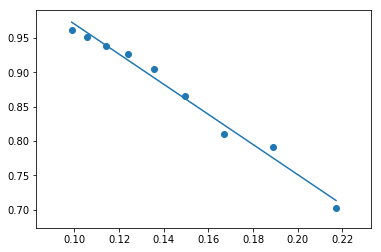

In [0]:
def P4():

### STUDENT START ###
  # Transform train_sizes so it can be fed into linear regression model
  X_train_sizes = np.array(train_sizes)[:, np.newaxis]


### Create Linear Regression Model
  lin_model = LinearRegression()
  
    # use a plain linear model
  lin_model.fit(X_train_sizes, accuracies)
  n_60000_pred = lin_model.predict([[60000]])
  print(n_60000_pred)
  
    # use a simple log transform to increase linearity
  lin_model.fit(np.log(X_train_sizes), accuracies)
  n_60000_pred = lin_model.predict([np.log([60000])])
  print(n_60000_pred)
  
  # use a simple 1/log transform to increase linearity
  lin_model.fit(1/np.log(X_train_sizes), accuracies)
  n_60000_pred = lin_model.predict([1/np.log([60000])])
  pred = lin_model.predict(1/np.log(X_train_sizes))
  print(n_60000_pred)
  plt.scatter(1/np.log(X_train_sizes),accuracies)
  plt.plot(1/np.log(X_train_sizes),pred)
### STUDENT END ###

P4()

ANSWER: A simple linear regression gave a predicted accuracy of 1.25, which is not possible as the accuracy cannot be  greater than 1. After looking at the residual cure an log transformation was used, but the accuracy was still above 1, at 1.03. Finally a 1/log transform of the input variable train_size was implemented, giving an accuracy of 0.99, a reasonable prediction.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

The most confused pair of digits are True 4's labeled as 9. A few examples of confused digits are shown below: 


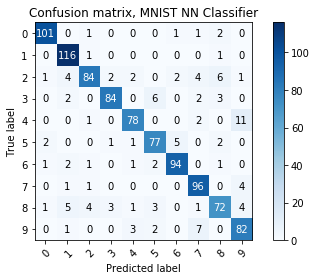

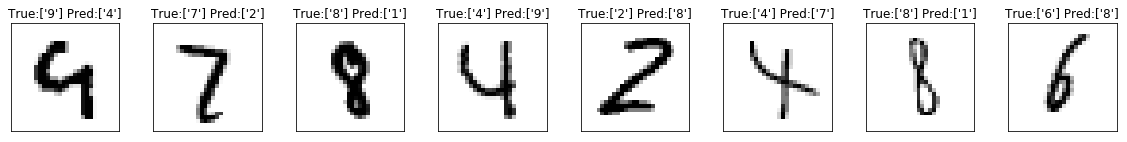

In [0]:
def P5():

### STUDENT START ###

# Train kNN model on all training data, k_value = 1
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(mini_train_data, mini_train_labels)
  dev_predict = model.predict(dev_data)
  np.set_printoptions(precision=3)

  # Compute confusion matrix
  cm = confusion_matrix(dev_labels, dev_predict)
  
  labels = sorted(set(train_labels)) # create a list of labels for the digits
  num_labels = len(labels) # count number of possible labels
  
  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cm = cm, classes= labels,
                      title='Confusion matrix, MNIST NN Classifier')
      
  print("The most confused pair of digits are True 4's labeled as 9. A few examples of confused digits are shown below: ")
  
  
  
  cmap = plt.cm.gray_r # Convert color map to grey scale
   
 # Set the figure data 
  fig,ax = plt.subplots(nrows=1, ncols=8, figsize=(20, 2))
   
# # Iterate over the labels, creating a 10x10 subplots with 10 examples of each label.
#   for label in range(num_labels):  
  im_idx = np.argwhere((dev_labels != dev_predict))#  dev_labels == labels[label])& # builds array of the locations where the label equals the label being plotted
  for num in range(8): # iterate for as many times as the number of example chosen by the user
    image_pl = np.reshape(dev_data[im_idx][num],(28,28)) # reshape image array to 28x28 for plotting
    ax[num].imshow(image_pl, cmap = cmap) #plot image  
    ax[num].set_xticks([]) # remove ticks on x 
    ax[num].set_yticks([]) # remove ticks on y 
    ax[num].set_title('True:%s Pred:%s' %(dev_labels[im_idx][num],dev_predict[im_idx][num] ) ) #title 
  
 

  
# Code for plot_confusion_matrix adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """



    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

    
### STUDENT END ###

P5()

ANSWER: The most confused pair of digits are True 4's labeled as 9. A few examples of incorrect predictions are shown above.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Original images, no blurring on test or development data :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Training data blurred, development data not blurred :
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       106
           1       

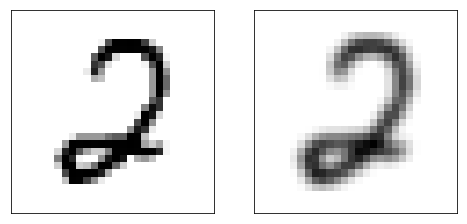

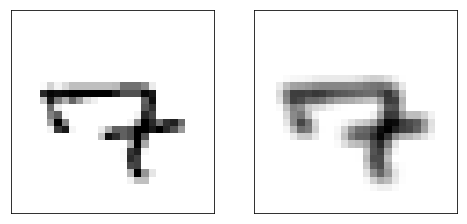

In [0]:

def P6():
    
### STUDENT START ###
  
  # Create blurred data sets
  mini_train_data_blurred = np.array(map(blur, mini_train_data))
  dev_data_blurred = np.array(map(blur, dev_data))

  kNN_fit(mini_train_data, dev_data, mini_train_labels, dev_labels, 'Original images, no blurring on test or development data') # original, no images blurred  
  kNN_fit(mini_train_data_blurred, dev_data, mini_train_labels, dev_labels, 'Training data blurred, development data not blurred') # Training data blurred, development data not blurred
  kNN_fit(mini_train_data, dev_data_blurred, mini_train_labels, dev_labels, 'Training data not blurred, development data blurred') #Training data not blurred, development data blurred
  kNN_fit(mini_train_data_blurred, dev_data_blurred, mini_train_labels, dev_labels, 'Training data blurred, development data blurred') #Training data blurred, development data blurred
  
  print "Examples of Guassian blur for a 3x3 matrix and sigma =1"
  map(plotting_blur, mini_train_data[3:5])

def blur(image):
  """Blur image according to Gaussian blur, sigma 1"""
  # Copy image 
  image_to_blur = np.copy(image.reshape((28,28)))
  image_blurred = np.copy(image)
  
  #Create 3x3 Gaussian blurring matrix (sigma = 1)
  kernel_sigma1 = gaussian_filter(sigma=1)
  kernel = kernel_sigma1.reshape(-1,1)
  
  # Add row and column of zeros to image edges to allow edge blurring
  image_to_blur = np.insert(np.insert(np.insert(image_to_blur, 28 , 0, axis=0), 0 , 0, axis=1), 0 , 0, axis=0)
  image_to_blur = np.append(image_to_blur, np.zeros((30,1), dtype=int), axis=1)
  
  for i in range(1,28): # loop through rows
    for j in range (1,28):
      #splice image array to get 3x3 matrix for gaussian blurring
      image_to_blur_matrix =  image_to_blur[i-1:i+2,j-1:j+2].reshape(1, -1)
      # insert new pixel into image_blurred. New pixel is created via gaussian blur matrix 'kernel'
      image_blurred[(i-1)*28 +(j-1)] = np.dot(image_to_blur_matrix,kernel)
  return image_blurred # return new image array


def gaussian_filter(shape =(3,3), sigma=1):
  """Function for returning a Gaussian Matrix"""
  x, y = [edge /2 for edge in shape]
  grid = np.array([[((i**2+j**2)/(2.0*sigma**2)) for i in xrange(-x, x+1)] for j in xrange(-y, y+1)])
  g_filter = np.exp(-grid)/(2*np.pi*sigma**2)
  g_filter /= np.sum(g_filter)
  return g_filter

 
def kNN_fit(train_data, dev_data, train_labels, dev_labels, title):
  """fit K-Nearest-Neighbors model with k=1 and return accuracy statistics"""

  # For k=1, show precision, recall, and F1 for each label. 
  kn_model1=KNeighborsClassifier(n_neighbors=1)
  kn_model1.fit(train_data, train_labels)
  accuracy = classification_report(dev_labels, kn_model1.predict(dev_data))   
  print title, ":"
  print ("%s" %(accuracy))
  
def plotting_blur(image):
  """Function to plot original image and blurred image pair"""
  # Set the figure data 
  fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

  ax[0].imshow(np.copy(image.reshape((28,28))), cmap = plt.cm.gray_r) #plot original image 
  ax[1].imshow(np.copy(blur(image).reshape((28,28))), cmap = plt.cm.gray_r) #plot blurred image  
  ax[0].set_xticks([]) # remove ticks on x
  ax[0].set_yticks([]) # remove ticks on y   
  ax[1].set_xticks([]) # remove ticks on x
  ax[1].set_yticks([]) # remove ticks on y  
  
  
### STUDENT END ###

P6()



ANSWER:

By employing a simple Gaussian blur to a model trained on the mini_train_data set the accuracy of prediction was increased by ~3%. This is a >25% decrease in the error rate. The increase in accuracy was best when the blur was only applied to the training data. The performance was worse than the base case (no blurring) when the test data was blurred without the training data being blurred. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

Accuracy of the binary NB classifier: 0.827

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.96      0.90      0.93       126
           2       0.75      0.84      0.79        94
           3       0.77      0.72      0.75       104
           4       0.86      0.76      0.81       104
           5       0.72      0.89      0.79        71
           6       0.90      0.84      0.87       109
           7       0.87      0.94      0.90        95
           8       0.70      0.68      0.69        97
           9       0.77      0.78      0.77        94

   micro avg       0.83      0.83      0.83      1000
   macro avg       0.82      0.83      0.82      1000
weighted avg       0.83      0.83      0.83      1000

Accuracy of the Multinomial NB classifier: 0.827

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       107
           1       0.92      0.87  

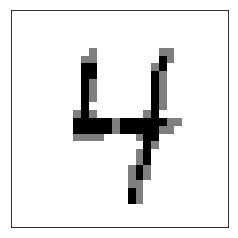

In [0]:
def P7():

### STUDENT START ###

  ## simple binary Naive Bayes classifier 
  nb_binary = BernoulliNB(binarize = 0.5, alpha = 1.0)
  nb_binary.fit(train_data, train_labels)
  nb_predict = nb_binary.predict(dev_data)
  
  #report accuracy
  accuracy = classification_report(nb_predict, dev_labels)
  modelscore = nb_binary.score(dev_data, dev_labels)
  print "Accuracy of the binary NB classifier: %.3f\n\n %s" %(modelscore, accuracy)
  
  
  ## MultinomialNB classifier with the pixel values mapped to 0, 1, or 2, representing white, grey, or black
  
  # Vector to map pixel values to 0, 1, or 2, representing white, grey, or black
  pixel_mapping = np.vectorize(lambda x: 2 if x > 0.9 else 0 if x < 0.4 else 1)
  # map input training and test data
  train_data_vec = pixel_mapping(np.copy(train_data))
  dev_data_vec = pixel_mapping(np.copy(dev_data))
  
  ## Multinomial Naive Bayes classifier 
  nb_multi = MultinomialNB()
  nb_multi.fit(train_data_vec, train_labels)
  nb_multi_predict = nb_multi.predict(dev_data_vec)

  #report accuracy
  accuracy = classification_report(nb_multi_predict, dev_labels)
  modelscore = nb_multi.score(dev_data, dev_labels)
  print "Accuracy of the Multinomial NB classifier: %.3f\n\n %s" %(modelscore, accuracy)

  print "Example of White/Grey/Black Image: \n"
  plotting(train_data_vec[1])

def plotting(image):
  """Function to plot original image and blurred image pair"""
  # Set the figure data 
  fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

  ax.imshow(np.copy(image.reshape((28,28))), cmap = plt.cm.gray_r) #plot original image 
  ax.set_xticks([]) # remove ticks on x
  ax.set_yticks([]) # remove ticks on y   
    
### STUDENT END ###

P7()





ANSWER: The Multinomial Naive Bayes Classifier only has no accuracy increase over the binary NB classifier with tuning of the split between white, grey and black. Indeed, the performance was actually worse for most splits values explored. the split that optimised the accuracy was balck if > 0.9,  white if < 0.4 else grey (0.4 <= x<= 0.9. Thus overall, an MultinomialNB does not improve on the accuracy of the Bernoulli (binary) NB classifier, This is probably due to the lack of additional information brought to the model for the grey pixels: in the low resolution 28x28 grid the 3rd colour does not add enough information to make a difference. It is likely the binarized data allows the model to work with primary features such as artifacts in the image. Visually, from the plot above, the grey provides a little more context to the edge, but not enough to increase accuracy.



(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [0]:
def P8(alphas):

### STUDENT START ###
  
  ## Grid search Binomial Naive Bayes classifier 
  gridsearch = GridSearchCV(BernoulliNB(binarize  = 0.5), alphas, cv=3)
  gridsearch.fit(mini_train_data, mini_train_labels)
  grid_predict = gridsearch.predict(dev_data)

  #report accuracy
  accuracy = classification_report(grid_predict, dev_labels)
  modelscore = gridsearch.score(dev_data, dev_labels)
  print "Accuracy of the Bernoulli NB classifier: %.3f\n\n %s" %(modelscore, accuracy)

  return gridsearch
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Accuracy of the Bernoulli NB classifier: 0.828

               precision    recall  f1-score   support

           0       0.91      0.93      0.92       103
           1       0.93      0.92      0.92       120
           2       0.81      0.75      0.78       114
           3       0.77      0.75      0.76       100
           4       0.83      0.76      0.79       100
           5       0.73      0.82      0.77        78
           6       0.86      0.94      0.90        94
           7       0.86      0.94      0.90        94
           8       0.74      0.67      0.71       104
           9       0.79      0.81      0.80        93

   micro avg       0.83      0.83      0.83      1000
   macro avg       0.82      0.83      0.82      1000
weighted avg       0.83      0.83      0.83      1000



In [0]:
np.set_printoptions(precision=3)
print nb.best_params_
print alphas
print nb.cv_results_['mean_test_score']

{'alpha': 0.001}
{'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
[0.814 0.825 0.827 0.825 0.821 0.815 0.811 0.803 0.744]


ANSWER: The best value for alpha is 0.001. This has an accuracy of 82.7%.  This is similar to the accuracy achieved with the larger training size of train_data in P7 using a default value of alpha = 1. The small increase in alpha applies a small amount of smoothing and reduces noise in the dataset. This is similar to the effect of the Gaussian blur. Manipulating the alpha has little effect to a model trained on  the larger train_data set because  the number of samples is much larger than the number of classifications and thus the possibilities are fairly well represented. The mini_data_set leaves some room for improvement via smoothing, allowing a model to be trained quickly to a similar accuracy.

Note, the smallest allowable value for alpha is 1e-10, not 0. The accuracy is lower than in P7 because a smaller training set was used. The lower accuracy than 0.001 is expected as the noise in the dataset causes some digits to be confused by the model.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [0]:
def P9():

### STUDENT END ###
  
  
  ## Gaussian Naive Bayes classifier 
  gaussian_nb = GaussianNB() # manipulated var_smoothing to get reasonable sigma (variance)
  gaussian_nb.fit(train_data, train_labels)
  gaussian_nb_predict = gaussian_nb.predict(dev_data)

  #report accuracy
  accuracy = classification_report(gaussian_nb_predict, dev_labels)
  modelscore = gaussian_nb.score(dev_data, dev_labels)
  print "Accuracy of the Multinomial NB classifier: %.3f\n\n %s" %(modelscore, accuracy)


  return gaussian_nb

def plotting(image):
  """Function to plot theta or sigma images"""
  # Set the figure data 
   # Set the figure data 
  fig,ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 2))
  
  for i in range(10):
    ax[i].imshow(np.copy(image[i].reshape((28,28))), cmap = plt.cm.gray_r) #plot original image 
    ax[i].set_xticks([]) # remove ticks on x
    ax[i].set_yticks([]) # remove ticks on y

### STUDENT END ###

gnb = P9()

Accuracy of the Multinomial NB classifier: 0.586

               precision    recall  f1-score   support

           0       0.92      0.79      0.85       123
           1       0.92      0.83      0.88       131
           2       0.23      0.89      0.36        27
           3       0.38      0.73      0.50        51
           4       0.28      0.93      0.43        28
           5       0.12      0.79      0.22        14
           6       0.92      0.61      0.73       154
           7       0.40      0.91      0.56        45
           8       0.60      0.27      0.37       208
           9       0.96      0.42      0.58       219

   micro avg       0.59      0.59      0.59      1000
   macro avg       0.57      0.72      0.55      1000
weighted avg       0.76      0.59      0.61      1000



In [0]:
print(gnb.theta_[1][:100])


[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.810e-04 2.948e-04 4.120e-05 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 4.990e-05 2.228e-04 3.633e-04 8.095e-04
 1.263e-03 1.285e-03 6.012e-04 2.449e-04 1.045e-04 1.468e-04 3.482e-05
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 2.437e-05 5.803e-06 0.000e+00 0.000e+00 0.000e+00
 1.683e-05 1.915e-05 1.311e-04 3.395e-04 7.509e-04 1.804e-03 4.764e-03
 6.566

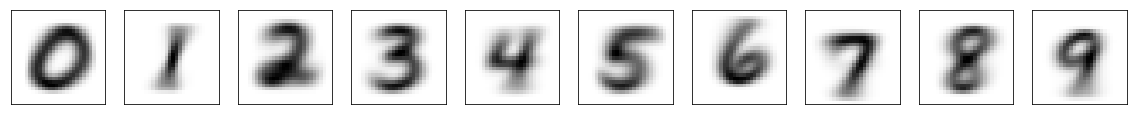

In [0]:

plotting(gnb.theta_)

In [0]:
print(gnb.sigma_[9][:])



[1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10 1.994e-10
 1.994

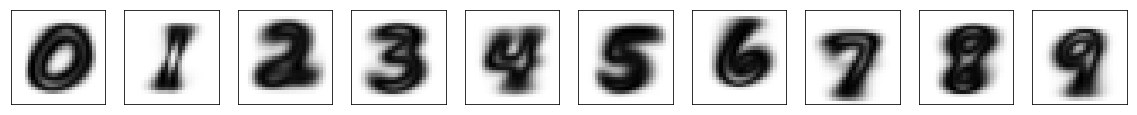

In [0]:
plotting(gnb.sigma_)

In [0]:
def P9():

### STUDENT END ###
  
  
  ## Gaussian Naive Bayes classifier 
  gaussian_nb = GaussianNB(var_smoothing = 0.05)# manipulated var_smoothing to get reasonable sigma (variance)
  gaussian_nb.fit(train_data, train_labels)
  gaussian_nb_predict = gaussian_nb.predict(dev_data)

  #report accuracy
  accuracy = classification_report(gaussian_nb_predict, dev_labels)
  modelscore = gaussian_nb.score(dev_data, dev_labels)
  print "Accuracy of the Multinomial NB classifier: %.3f\n\n %s" %(modelscore, accuracy)


  return gaussian_nb

def plotting(image):
  """Function to plot theta or sigma images"""
  # Set the figure data 
   # Set the figure data 
  fig,ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 2))
  
  for i in range(10):
    ax[i].imshow(np.copy(image[i].reshape((28,28))), cmap = plt.cm.gray_r) #plot original image 
    ax[i].set_xticks([]) # remove ticks on x
    ax[i].set_yticks([]) # remove ticks on y

### STUDENT END ###

gnb = P9()

Accuracy of the Multinomial NB classifier: 0.814

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       107
           1       0.96      0.85      0.90       133
           2       0.67      0.89      0.76        80
           3       0.76      0.78      0.77        95
           4       0.76      0.81      0.79        86
           5       0.66      0.89      0.76        65
           6       0.90      0.81      0.86       113
           7       0.86      0.98      0.92        90
           8       0.69      0.61      0.65       107
           9       0.89      0.69      0.78       124

   micro avg       0.81      0.81      0.81      1000
   macro avg       0.81      0.82      0.81      1000
weighted avg       0.83      0.81      0.81      1000



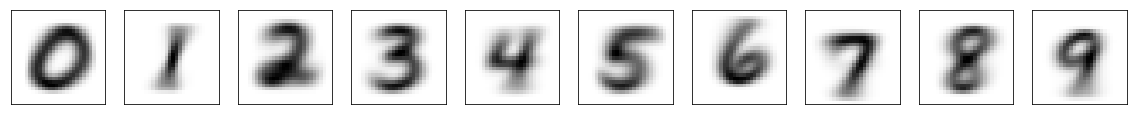

In [0]:

plotting(gnb.theta_)

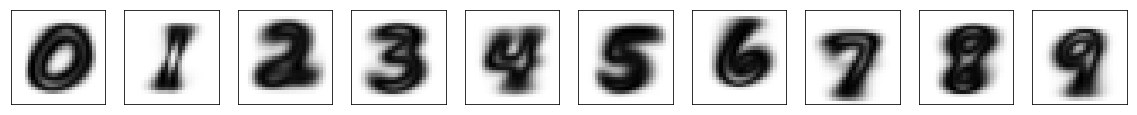

In [0]:
plotting(gnb.sigma_)

ANSWER: As a Guassian model, the classifier is expecting a normal distribution of features.  The theta value is the mean of each feature per class and in general the numbers are small for the model. The  sigma value is the variance of each feature per class, and in general it is also small. A combination of a low valued mean and a low variance leads to computational insignificance of the features. By increasing var_smoothing from it's default value of 1e9 to 0.1, the noise from the variance amplified  through filtering of the input data, allowing the features to provide information to the model. This allows the model to generalise better to new examples, hence the increase in accuracy.

An attempt was also made to normalise the input data directly in order to create the Gaussian distribution expected by the model. This was unsuccessful in increasing the accuracy but it may have been the way I implemented the code. See attempt below.

In [0]:
# Normalise training data

def P9_norm():

### STUDENT END ###
  
  # normalise training data
  train_mean = np.mean(train_data, axis =0)
  train_var = np.std(train_data, axis =0)
  print train_mean.shape
  print train_var.shape
  
#   for i in range(len(train_data)):
  train_norm = np.divide(np.subtract(train_data, train_mean),train_var, out=np.zeros_like(np.subtract(train_data, train_mean)), where=train_var!=0)
  
  dev_data_norm = np.divide(np.subtract(dev_data, train_mean),train_var, out=np.zeros_like(np.subtract(dev_data, train_mean)), where=train_var!=0)
#   print(train_norm[0])
  
  ## Gaussian Naive Bayes classifier 
  gaussian_nb = GaussianNB()#priors = y )
  gaussian_nb.fit(train_norm, train_labels)
  gaussian_nb_predict = gaussian_nb.predict(dev_data_norm)

  #report accuracy
  accuracy = classification_report(gaussian_nb_predict, dev_labels)
  modelscore = gaussian_nb.score(dev_data_norm, dev_labels)
  print "Accuracy of the Multinomial NB classifier: %.3f\n\n %s" %(modelscore, accuracy)

  return gaussian_nb

def plotting(image):
  """Function to plot theta or sigma images"""
  # Set the figure data 
   # Set the figure data 
  fig,ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 2))
  
  for i in range(10):
    ax[i].imshow(np.copy(image[i].reshape((28,28))), cmap = plt.cm.gray_r) #plot original image 
    ax[i].set_xticks([]) # remove ticks on x
    ax[i].set_yticks([]) # remove ticks on y
    
    ### STUDENT END ###

gnb = P9_norm()

(784,)
(784,)
Accuracy of the Multinomial NB classifier: 0.550

               precision    recall  f1-score   support

           0       0.91      0.76      0.82       127
           1       0.92      0.86      0.89       127
           2       0.18      0.86      0.30        22
           3       0.27      0.68      0.39        38
           4       0.20      0.90      0.32        20
           5       0.06      0.56      0.10         9
           6       0.89      0.66      0.76       138
           7       0.32      0.94      0.48        35
           8       0.66      0.23      0.35       265
           9       0.96      0.42      0.58       219

   micro avg       0.55      0.55      0.55      1000
   macro avg       0.54      0.69      0.50      1000
weighted avg       0.77      0.55      0.59      1000



(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

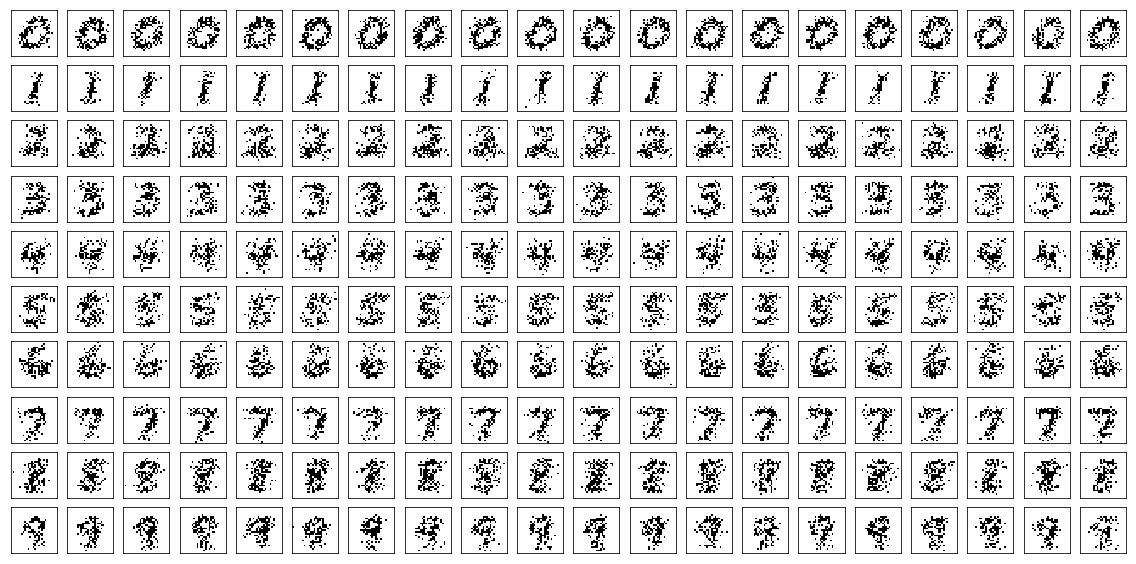

In [0]:
def P10(num_examples):

### STUDENT START ###

  ## Fit BernoulliNB model
  nb_binary = BernoulliNB(binarize = 0.5, alpha = 1.0)
  nb_binary.fit(train_data, train_labels)
  nb_predict = nb_binary.predict(dev_data)

 # Set the figure data 
  fig,ax = plt.subplots(nrows=10, ncols=num_examples, figsize=(num_examples, 10))
   
# # Iterate over the labels, creating a 10x10 subplots with 10 examples of each label.
  for label in range(10):  # iterate through the 10 digits
    for num in range(num_examples): # iterate for as many times as the number of example chosen by the user
#       print np.exp(nb_binary.feature_log_prob_[label])
      image_pl = np.reshape(np.random.rand(784) < np.exp(nb_binary.feature_log_prob_[label]),(28,28)) # reshape image array to 28x28 for plotting
      ax[label,num].imshow(image_pl, cmap = plt.cm.gray_r ) #plot image in greyscale
      ax[label,num].set_xticks([]) # remove ticks on x 
      ax[label,num].set_yticks([]) # remove ticks on y  

### STUDENT END ###

P10(20)


ANSWER: In general the algorithm produced recognisable digits. However it is evident which digits had the weaker models, namely 4, 8 and 9 which each have several examples which are difficult to make out.  This is similar to earlier models, including the kNN classifier as well as the NB classifiers.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [0]:
def P11(buckets, correct, total):
    
### STUDENT START ###
  
## Fit BernoulliNB model
  nb_binary = BernoulliNB(binarize = 0.5, alpha = 0.001)
  nb_binary.fit(mini_train_data, mini_train_labels)
  
  # get predicted values and predicted probabilties
  nb_predict = nb_binary.predict(dev_data)
  nb_predict_probs = nb_binary.predict_proba(dev_data)
  # extract the top probability for each image, this is the probability calculated for the assigned label
  nb_predict_probs_max = np.max(nb_predict_probs, axis = 1)
  nb_predict_correct_probs = nb_predict_probs_max[np.argwhere(nb_predict == dev_labels)]
  
  # count the number of probablities that fall into each bucket (unique is used to count the bins created by digitize)
  # np output is converted to float and list 
  total = np.unique(np.digitize(nb_predict_probs_max, buckets, right=True), return_counts=True)[1].astype(np.float64).tolist()
  correct = np.unique(np.digitize(nb_predict_correct_probs, buckets, right=True), return_counts=True)[1].astype(np.float64).tolist()
  
  # Add zero for count of probablities <= 0.5
  total = np.insert(total, 0 , 0, axis=0)
  correct = np.insert(correct, 0 , 0, axis=0)
  
  
  return correct, total
  
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

correct, total = P11(buckets, correct, total)

for i in range(len(buckets)):
   accuracy = 0.0
   if (total[i] > 0): accuracy = correct[i] / total[i]
   print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  36    accuracy = 0.389
p(pred) <= 0.9990000000000    total =  90    accuracy = 0.444
p(pred) <= 0.9999900000000    total =  69    accuracy = 0.565
p(pred) <= 0.9999999000000    total =  67    accuracy = 0.672
p(pred) <= 0.9999999990000    total =  50    accuracy = 0.820
p(pred) <= 0.9999999999900    total =  72    accuracy = 0.903
p(pred) <= 0.9999999999999    total =  66    accuracy = 0.894
p(pred) <= 1.0000000000000    total = 550    accuracy = 0.955


ANSWER: The model is weakly calibrated as there is positive correlation between the accuracy and the posterier probability. However the model is not perfectly calibrated as the posterier probability is > than the accuracy of the model. In fact, the calibration is quite poor as the accuracy from ~50% to 95% where the posterior probability moves from 0.99999 to 1 which is highly non-linear. 


(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [0]:
def P7_simple(train_data, train_labels, dev_data, dev_labels):

### STUDENT START ###

  ## simple binary Naive Bayes classifier 
  nb_binary = BernoulliNB(binarize = 0.5, alpha = 1.0)
  nb_binary.fit(train_data, train_labels)
  nb_predict = nb_binary.predict(dev_data)
  
  #report accuracy
  accuracy = classification_report(nb_predict, dev_labels)
  modelscore = nb_binary.score(dev_data, dev_labels)
  print "Accuracy of the binary NB classifier: %.3f\n\n %s" %(modelscore, accuracy)
  

### STUDENT END ###

P7_simple(mini_train_data, mini_train_labels, dev_data, dev_labels)


def P9_simple(train_data, train_labels, dev_data, dev_labels):
  gaussian_nb = GaussianNB(var_smoothing = 0.05)
  gaussian_nb.fit(train_data, train_labels)
  gaussian_nb_predict = gaussian_nb.predict(dev_data)

  #report accuracy
  accuracy = classification_report(gaussian_nb_predict, dev_labels)
  modelscore = gaussian_nb.score(dev_data, dev_labels)
  print "Accuracy of the Multinomial NB classifier: %.3f\n\n %s" %(modelscore, accuracy)
  
P9_simple(mini_train_data, mini_train_labels, dev_data, dev_labels)



Accuracy of the binary NB classifier: 0.819

               precision    recall  f1-score   support

           0       0.90      0.94      0.92       101
           1       0.96      0.87      0.91       130
           2       0.72      0.79      0.75        96
           3       0.78      0.75      0.77       101
           4       0.86      0.78      0.82       101
           5       0.72      0.85      0.78        74
           6       0.89      0.89      0.89       102
           7       0.87      0.86      0.87       103
           8       0.73      0.65      0.69       106
           9       0.72      0.79      0.75        86

   micro avg       0.82      0.82      0.82      1000
   macro avg       0.81      0.82      0.81      1000
weighted avg       0.82      0.82      0.82      1000

Accuracy of the Multinomial NB classifier: 0.816

               precision    recall  f1-score   support

           0       0.92      0.93      0.92       104
           1       0.96      0.86  

In [0]:
def P12_pixel_col_count():
  ### STUDENT START ###
  
  mini_train_data_cols = create_pixel_count(mini_train_data)
  dev_cols = create_pixel_count(dev_data)
  
    # Run the GuassianNB on this new set.
  P9_simple(mini_train_data_cols, mini_train_labels, dev_cols, dev_labels)
  

def create_pixel_count(data):
  
  # New training data arrays, of larger size to fit the 28*2 new features.
  data_cols = np.empty(shape = (len(data),840))
  
  # Loop through the range of images in the data sets.
  for i in range(len(data)):
    # Append the two axis sums to the each sample.
    data_cols[i] = np.append(data[i],
                                np.concatenate((data[i].reshape((28,28)).sum(axis = 0)/28,
                                                data[i].reshape((28,28)).sum(axis = 1)/28)))                                               
  return data_cols


  ### STUDENT END ###
P12_pixel_col_count()

Accuracy of the Multinomial NB classifier: 0.817

               precision    recall  f1-score   support

           0       0.92      0.93      0.92       104
           1       0.96      0.86      0.91       131
           2       0.69      0.83      0.75        88
           3       0.76      0.81      0.79        91
           4       0.74      0.81      0.77        84
           5       0.73      0.79      0.76        81
           6       0.87      0.86      0.87       103
           7       0.86      0.99      0.92        89
           8       0.72      0.63      0.67       108
           9       0.87      0.69      0.77       121

   micro avg       0.82      0.82      0.82      1000
   macro avg       0.81      0.82      0.81      1000
weighted avg       0.82      0.82      0.82      1000



In [0]:
from scipy.ndimage import label

def P12_region_count():
  
  ### STUDENT START ###
   
  # Loop through the training data.
  mt_data_rgn = region_feature(mini_train_data)
  # Repeat for dev set.
  dev_rgn = region_feature(dev_data)
  
   # Run the Guassian NB on the new dataset.
  P9_simple(mt_data_rgn, mini_train_labels, dev_rgn, dev_labels)
  
def region_feature(data_set):
  
  
  # Define function with binarisation AND inversion of the images with threshold 0.3
  vec_func = np.vectorize(lambda x: 1 if x < 0.3 else 0)
  #calculate length of dataset 
  len_data = len(data_set)
  # New arrays with one extra item - for the enclosed space count.
  data_rgn = np.empty(shape = (len_data,785))
  
  # Apply the blur function
  images = np.array(map(blur_simple, np.copy(data_set)))
  
  for i in range(len_data):
    # Apply the binariser
    images[i] = vec_func(images[i])
    bmp = images[i].reshape((28,28))
    
    # The features of the inverse image are the enclosed areas of the positive values
    # use Scipy to label them.
    labels, num_features = label(bmp)

    # Standardise the number of features and append.
    data_rgn[i] = np.append(data_set[i], (num_features - 1)/2)
    
  return data_rgn

def blur_simple(image):
  """Blur image according to Gaussian blur, sigma 1"""
  # Copy image 
  image_to_blur = np.copy(image.reshape((28,28)))
  image_blurred = np.copy(image)
  
  #Create 3x3 Gaussian blurring matrix (sigma = 1)
  kernel_sigma1 = gaussian_filter(sigma=1)
  kernel = kernel_sigma1.reshape(-1,1)
  
  # Add row and column of zeros to image edges to allow edge blurring
  image_to_blur = np.insert(np.insert(np.insert(image_to_blur, 28 , 0, axis=0), 0 , 0, axis=1), 0 , 0, axis=0)
  image_to_blur = np.append(image_to_blur, np.zeros((30,1), dtype=int), axis=1)
  
  for i in range(1,28): # loop through rows
    for j in range (1,28):
      #splice image array to get 3x3 matrix for gaussian blurring
      image_to_blur_matrix =  image_to_blur[i-1:i+2,j-1:j+2].reshape(1, -1)
      # insert new pixel into image_blurred. New pixel is created via gaussian blur matrix 'kernel'
      image_blurred[(i-1)*28 +(j-1)] = np.dot(image_to_blur_matrix,kernel)
  return image_blurred # return new image array
 
  ### STUDENT END ###

P12_region_count()

Accuracy of the Multinomial NB classifier: 0.821

               precision    recall  f1-score   support

           0       0.92      0.93      0.92       104
           1       0.96      0.86      0.91       131
           2       0.71      0.81      0.75        93
           3       0.75      0.85      0.80        86
           4       0.73      0.80      0.76        84
           5       0.73      0.79      0.76        81
           6       0.88      0.87      0.88       103
           7       0.86      0.99      0.92        89
           8       0.77      0.66      0.71       109
           9       0.86      0.68      0.76       120

   micro avg       0.82      0.82      0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



ANSWER: The additional pixel count did little to improve the accuracy of the Gaussian classifier. It is likely that it does not add much additional information that was already available in the raw form of the features. The enclosed region was more successful in increasing the accuracy, but it was sensitive to the amount of bluring applied and the threshold values used for the binarisation of the pixels. This is likely due to the variation of enclosure of region based on pen strokes.